In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.api import plot_leverage_resid2, influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from itertools import combinations

In [2]:
uploaded = files.upload()

Saving deflator_yearly_agg.csv to deflator_yearly_agg (1).csv
Saving gdp_norm_monthly_agg.csv to gdp_norm_monthly_agg (1).csv
Saving general_cpi_monthly_agg.csv to general_cpi_monthly_agg (1).csv
Saving Household_debt_yearly_agg.csv to Household_debt_yearly_agg (1).csv
Saving Santiago_gdp_yearly_agg.csv to Santiago_gdp_yearly_agg (1).csv
Saving unemployment_yearly_agg.csv to unemployment_yearly_agg (1).csv


In [3]:
df_deflator = pd.read_csv('deflator_yearly_agg.csv')
df_gdp_norm_monthly = pd.read_csv('gdp_norm_monthly_agg.csv')
df_cpi_monthly = pd.read_csv('general_cpi_monthly_agg.csv')
df_debt = pd.read_csv('Household_debt_yearly_agg.csv')
df_gdp_santiago = pd.read_csv('Santiago_gdp_yearly_agg.csv')
df_unemployment = pd.read_csv('unemployment_yearly_agg.csv')

# Prepare the DATA #
Aggregate
Standardize
Merge

## GDP Deflator

In [4]:
df_deflator

,EXTRACTIONDATE,Country Name,YEAR,DATE,deflator(annual%),LIKELIHOODOFDEFAULT
0,2024-03-23,Chile,2006,2006-12-31,12.349896,0.032722
1,2024-03-23,Chile,2007,2007-12-31,5.088757,0.048319
2,2024-03-23,Chile,2008,2008-12-31,0.311133,0.057514
3,2024-03-23,Chile,2009,2009-12-31,3.577795,0.065448
4,2024-03-23,Chile,2010,2010-12-31,8.857441,0.094427
5,2024-03-23,Chile,2011,2011-12-31,3.260515,0.101237
6,2024-03-23,Chile,2012,2012-12-31,0.763467,0.107576
7,2024-03-23,Chile,2013,2013-12-31,2.260771,0.068015
8,2024-03-23,Chile,2014,2014-12-31,5.852892,0.074191
9,2024-03-23,Chile,2015,2015-12-31,4.954366,0.081544


In [5]:
# Standardizing
scaler = StandardScaler()
df_deflator['Deflator_standardized'] = scaler.fit_transform(df_deflator[['deflator(annual%)']])

# Converting default rate to percentage
df_deflator['Default%'] = df_deflator['LIKELIHOODOFDEFAULT'] * 100

In [6]:
df_deflator

,EXTRACTIONDATE,Country Name,YEAR,DATE,deflator(annual%),LIKELIHOODOFDEFAULT,Deflator_standardized,Default%
0,2024-03-23,Chile,2006,2006-12-31,12.349896,0.032722,2.363925,3.2722
1,2024-03-23,Chile,2007,2007-12-31,5.088757,0.048319,0.048813,4.8319
2,2024-03-23,Chile,2008,2008-12-31,0.311133,0.057514,-1.474466,5.7514
3,2024-03-23,Chile,2009,2009-12-31,3.577795,0.065448,-0.432937,6.5448
4,2024-03-23,Chile,2010,2010-12-31,8.857441,0.094427,1.250405,9.4427
5,2024-03-23,Chile,2011,2011-12-31,3.260515,0.101237,-0.534097,10.1237
6,2024-03-23,Chile,2012,2012-12-31,0.763467,0.107576,-1.330246,10.7576
7,2024-03-23,Chile,2013,2013-12-31,2.260771,0.068015,-0.852852,6.8015
8,2024-03-23,Chile,2014,2014-12-31,5.852892,0.074191,0.292446,7.4191
9,2024-03-23,Chile,2015,2015-12-31,4.954366,0.081544,0.005964,8.1544


In [7]:
df_deflator = df_deflator[['YEAR', 'Deflator_standardized', 'Default%']]
df_deflator

,YEAR,Deflator_standardized,Default%
0,2006,2.363925,3.2722
1,2007,0.048813,4.8319
2,2008,-1.474466,5.7514
3,2009,-0.432937,6.5448
4,2010,1.250405,9.4427
5,2011,-0.534097,10.1237
6,2012,-1.330246,10.7576
7,2013,-0.852852,6.8015
8,2014,0.292446,7.4191
9,2015,0.005964,8.1544


## Chile GDP Normalized

In [8]:
df_gdp_norm_monthly

,EXTRACTIONDATE,OBSERVATION_DATE,GDP_NORMALIZED,YEAR,MONTH,LIKELIHOODOFDEFAULT
0,2024-03-31,2006-01-01,100.776983,2006,1,0.019363
1,2024-03-31,2006-02-01,100.804387,2006,2,0.017998
2,2024-03-31,2006-03-01,100.858167,2006,3,0.036930
3,2024-03-31,2006-04-01,100.934271,2006,4,0.036691
4,2024-03-31,2006-05-01,101.023159,2006,5,0.026561
...,...,...,...,...,...,...
186,2024-03-31,2021-07-01,100.708930,2021,7,0.144391
187,2024-03-31,2021-08-01,101.208495,2021,8,0.166013
188,2024-03-31,2021-09-01,101.663892,2021,9,0.157074
189,2024-03-31,2021-10-01,102.068399,2021,10,0.139014


In [9]:
# Aggregate by Year
df_gdp_norm = df_gdp_norm_monthly.groupby('YEAR')[['GDP_NORMALIZED','LIKELIHOODOFDEFAULT']].mean().reset_index()
df_gdp_norm.columns = ['YEAR', 'GDP_NORMALIZED', 'Default']
df_gdp_norm

,YEAR,GDP_NORMALIZED,Default
0,2006,101.183413,0.031147
1,2007,101.468835,0.048223
2,2008,100.991230,0.057578
3,2009,97.966464,0.065099
4,2010,99.035276,0.094541
5,2011,100.079240,0.100884
6,2012,100.863203,0.107263
7,2013,101.092995,0.066995
8,2014,100.393099,0.073519
9,2015,100.187323,0.081137


In [10]:
# Standardizing
scaler = StandardScaler()
df_gdp_norm['GDP_standardized'] = scaler.fit_transform(df_gdp_norm[['GDP_NORMALIZED']])

# Converting default rate to percentage
df_gdp_norm['Default%'] = df_gdp_norm['Default'] * 100

In [11]:
df_gdp_norm

,YEAR,GDP_NORMALIZED,Default,GDP_standardized,Default%
0,2006,101.183413,0.031147,0.828314,3.114750
1,2007,101.468835,0.048223,1.021430,4.822267
2,2008,100.991230,0.057578,0.698284,5.757800
3,2009,97.966464,0.065099,-1.348267,6.509900
4,2010,99.035276,0.094541,-0.625111,9.454142
5,2011,100.079240,0.100884,0.081233,10.088433
6,2012,100.863203,0.107263,0.611661,10.726350
7,2013,101.092995,0.066995,0.767137,6.699517
8,2014,100.393099,0.073519,0.293589,7.351858
9,2015,100.187323,0.081137,0.154362,8.113717


In [12]:
df_gdp_norm = df_gdp_norm[['YEAR', 'GDP_standardized', 'Default%']]
df_gdp_norm

,YEAR,GDP_standardized,Default%
0,2006,0.828314,3.114750
1,2007,1.021430,4.822267
2,2008,0.698284,5.757800
3,2009,-1.348267,6.509900
4,2010,-0.625111,9.454142
5,2011,0.081233,10.088433
6,2012,0.611661,10.726350
7,2013,0.767137,6.699517
8,2014,0.293589,7.351858
9,2015,0.154362,8.113717


## CPI

In [13]:
df_cpi_monthly

,EXTRACTIONDATE,REG,Descripción series,Date (varchar),Date (#),IPC,YEAR,MONTH,LIKELIHOODOFDEFAULT,DATE
0,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Jan.2009,2009-01-01,59.05,2009,1,0.052036,2009-01-01
1,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Feb.2009,2009-02-01,58.28,2009,2,0.050888,2009-02-01
2,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Mar.2009,2009-03-01,58.30,2009,3,0.050589,2009-03-01
3,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Apr.2009,2009-04-01,58.21,2009,4,0.058679,2009-04-01
4,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),May.2009,2009-05-01,58.09,2009,5,0.065349,2009-05-01
...,...,...,...,...,...,...,...,...,...,...
176,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Sep.2023,2023-09-01,100.53,2023,9,0.293259,2023-09-01
177,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Oct.2023,2023-10-01,100.82,2023,10,0.267782,2023-10-01
178,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Nov.2023,2023-11-01,101.58,2023,11,0.360104,2023-11-01
179,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Dec.2023,2023-12-01,101.04,2023,12,0.439466,2023-12-01


In [14]:
# Aggregate by Year
df_cpi = df_cpi_monthly.groupby('YEAR')[['IPC','LIKELIHOODOFDEFAULT']].mean().reset_index()
df_cpi.columns = ['YEAR', 'CPI', 'Default']
df_cpi

,YEAR,CPI,Default
0,2009,58.250833,0.065099
1,2010,59.073333,0.094541
2,2011,61.045833,0.100884
3,2012,62.880000,0.107263
4,2013,64.095000,0.066995
5,2014,66.911667,0.073519
6,2015,69.823333,0.081137
7,2016,72.466667,0.097418
8,2017,74.048333,0.097344
9,2018,75.761667,0.097419


In [15]:
# Standardizing
scaler = StandardScaler()
df_cpi['CPI_standardized'] = scaler.fit_transform(df_cpi[['CPI']])

# Converting default rate to percentage
df_cpi['Default%'] = df_cpi['Default'] * 100

In [16]:
df_cpi

,YEAR,CPI,Default,CPI_standardized,Default%
0,2009,58.250833,0.065099,-1.251736,6.509900
1,2010,59.073333,0.094541,-1.190261,9.454142
2,2011,61.045833,0.100884,-1.042833,10.088433
3,2012,62.880000,0.107263,-0.905744,10.726350
4,2013,64.095000,0.066995,-0.814932,6.699517
5,2014,66.911667,0.073519,-0.604409,7.351858
6,2015,69.823333,0.081137,-0.386786,8.113717
7,2016,72.466667,0.097418,-0.189218,9.741817
8,2017,74.048333,0.097344,-0.071001,9.734392
9,2018,75.761667,0.097419,0.057057,9.741892


In [17]:
df_cpi = df_cpi[['YEAR', 'CPI_standardized', 'Default%']]
df_cpi

,YEAR,CPI_standardized,Default%
0,2009,-1.251736,6.509900
1,2010,-1.190261,9.454142
2,2011,-1.042833,10.088433
3,2012,-0.905744,10.726350
4,2013,-0.814932,6.699517
5,2014,-0.604409,7.351858
6,2015,-0.386786,8.113717
7,2016,-0.189218,9.741817
8,2017,-0.071001,9.734392
9,2018,0.057057,9.741892


## Household Debt

In [18]:
df_debt

,EXTRACTIONDATE,COUNTRY,YEAR,DATE,Debt(%GDP),LIKELIHOODOFDEFAULT
0,2024-03-23,Chile,2006,2006-12-31,26.392439,0.032722
1,2024-03-23,Chile,2007,2007-12-31,29.027133,0.048319
2,2024-03-23,Chile,2008,2008-12-31,32.631886,0.057514
3,2024-03-23,Chile,2009,2009-12-31,33.905979,0.065448
4,2024-03-23,Chile,2010,2010-12-31,32.583076,0.094427
5,2024-03-23,Chile,2011,2011-12-31,33.805600,0.101237
6,2024-03-23,Chile,2012,2012-12-31,35.339992,0.107576
7,2024-03-23,Chile,2013,2013-12-31,37.279834,0.068015
8,2024-03-23,Chile,2014,2014-12-31,39.367669,0.074191
9,2024-03-23,Chile,2015,2015-12-31,41.261339,0.081544


In [19]:
# Standardizing
scaler = StandardScaler()
df_debt['Debt_standardized'] = scaler.fit_transform(df_debt[['Debt(%GDP)']])

# Converting default rate to percentage
df_debt['Default%'] = df_debt['LIKELIHOODOFDEFAULT'] * 100

In [20]:
df_debt

,EXTRACTIONDATE,COUNTRY,YEAR,DATE,Debt(%GDP),LIKELIHOODOFDEFAULT,Debt_standardized,Default%
0,2024-03-23,Chile,2006,2006-12-31,26.392439,0.032722,-1.878668,3.2722
1,2024-03-23,Chile,2007,2007-12-31,29.027133,0.048319,-1.482802,4.8319
2,2024-03-23,Chile,2008,2008-12-31,32.631886,0.057514,-0.941184,5.7514
3,2024-03-23,Chile,2009,2009-12-31,33.905979,0.065448,-0.749750,6.5448
4,2024-03-23,Chile,2010,2010-12-31,32.583076,0.094427,-0.948517,9.4427
5,2024-03-23,Chile,2011,2011-12-31,33.805600,0.101237,-0.764832,10.1237
6,2024-03-23,Chile,2012,2012-12-31,35.339992,0.107576,-0.534287,10.7576
7,2024-03-23,Chile,2013,2013-12-31,37.279834,0.068015,-0.242824,6.8015
8,2024-03-23,Chile,2014,2014-12-31,39.367669,0.074191,0.070876,7.4191
9,2024-03-23,Chile,2015,2015-12-31,41.261339,0.081544,0.355402,8.1544


In [21]:
df_debt = df_debt[['YEAR', 'Debt_standardized', 'Default%']]
df_debt

,YEAR,Debt_standardized,Default%
0,2006,-1.878668,3.2722
1,2007,-1.482802,4.8319
2,2008,-0.941184,5.7514
3,2009,-0.749750,6.5448
4,2010,-0.948517,9.4427
5,2011,-0.764832,10.1237
6,2012,-0.534287,10.7576
7,2013,-0.242824,6.8015
8,2014,0.070876,7.4191
9,2015,0.355402,8.1544


## Santiago GDP

In [22]:
df_gdp_santiago

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,GDP(million_pesos),LIKELIHOODOFDEFAULT
0,2024-03-23,14.0,Producto Interno Bruto,2013,2013-12-31,57950.692393,0.068015
1,2024-03-23,14.0,Producto Interno Bruto,2014,2014-12-31,61747.513018,0.074191
2,2024-03-23,14.0,Producto Interno Bruto,2015,2015-12-31,67395.594568,0.081544
3,2024-03-23,14.0,Producto Interno Bruto,2016,2016-12-31,72096.318083,0.099478
4,2024-03-23,14.0,Producto Interno Bruto,2017,2017-12-31,75041.892228,0.099008
5,2024-03-23,14.0,Producto Interno Bruto,2018,2018-12-31,79326.313684,0.096684
6,2024-03-23,14.0,Producto Interno Bruto,2019,2019-12-31,82149.481470,0.108227
7,2024-03-23,14.0,Producto Interno Bruto,2020,2020-12-31,79602.544458,0.145762
8,2024-03-23,14.0,Producto Interno Bruto,2021,2021-12-31,91828.491152,0.153499
9,2024-03-23,14.0,Producto Interno Bruto,2022,2022-12-31,99978.597924,0.181699


In [23]:
# Standardizing
scaler = StandardScaler()
df_gdp_santiago['GDP_Santiago_standardized'] = scaler.fit_transform(df_gdp_santiago[['GDP(million_pesos)']])

# Converting default rate to percentage
df_gdp_santiago['Default%'] = df_gdp_santiago['LIKELIHOODOFDEFAULT'] * 100

In [24]:
df_gdp_santiago

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,GDP(million_pesos),LIKELIHOODOFDEFAULT,GDP_Santiago_standardized,Default%
0,2024-03-23,14.0,Producto Interno Bruto,2013,2013-12-31,57950.692393,0.068015,-1.531114,6.8015
1,2024-03-23,14.0,Producto Interno Bruto,2014,2014-12-31,61747.513018,0.074191,-1.221250,7.4191
2,2024-03-23,14.0,Producto Interno Bruto,2015,2015-12-31,67395.594568,0.081544,-0.760303,8.1544
3,2024-03-23,14.0,Producto Interno Bruto,2016,2016-12-31,72096.318083,0.099478,-0.376671,9.9478
4,2024-03-23,14.0,Producto Interno Bruto,2017,2017-12-31,75041.892228,0.099008,-0.136279,9.9008
5,2024-03-23,14.0,Producto Interno Bruto,2018,2018-12-31,79326.313684,0.096684,0.213378,9.6684
6,2024-03-23,14.0,Producto Interno Bruto,2019,2019-12-31,82149.481470,0.108227,0.443781,10.8227
7,2024-03-23,14.0,Producto Interno Bruto,2020,2020-12-31,79602.544458,0.145762,0.235922,14.5762
8,2024-03-23,14.0,Producto Interno Bruto,2021,2021-12-31,91828.491152,0.153499,1.233697,15.3499
9,2024-03-23,14.0,Producto Interno Bruto,2022,2022-12-31,99978.597924,0.181699,1.898838,18.1699


In [25]:
df_gdp_santiago = df_gdp_santiago[['YEAR', 'GDP_Santiago_standardized', 'Default%']]
df_gdp_santiago

,YEAR,GDP_Santiago_standardized,Default%
0,2013,-1.531114,6.8015
1,2014,-1.221250,7.4191
2,2015,-0.760303,8.1544
3,2016,-0.376671,9.9478
4,2017,-0.136279,9.9008
5,2018,0.213378,9.6684
6,2019,0.443781,10.8227
7,2020,0.235922,14.5762
8,2021,1.233697,15.3499
9,2022,1.898838,18.1699


## Unemployment Rate

In [26]:
df_unemployment

,EXTRACTIONDATE,COUNTRY,DATE,YEAR,Rate(percent),LIKELIHOODOFDEFAULT
0,2024-03-22 12:51:02.513,Chile,2006-12-31,2006,8.0,0.032722
1,2024-03-22 12:51:02.513,Chile,2007-12-31,2007,7.0,0.048319
2,2024-03-22 12:51:02.513,Chile,2008-12-31,2008,7.8,0.057514
3,2024-03-22 12:51:02.513,Chile,2009-12-31,2009,11.1,0.065448
4,2024-03-22 12:51:02.513,Chile,2010-12-31,2010,8.3,0.094427
5,2024-03-22 12:51:02.513,Chile,2011-12-31,2011,7.3,0.101237
6,2024-03-22 12:51:02.513,Chile,2012-12-31,2012,6.6,0.107576
7,2024-03-22 12:51:02.513,Chile,2013-12-31,2013,6.1,0.068015
8,2024-03-22 12:51:02.513,Chile,2014-12-31,2014,6.5,0.074191
9,2024-03-22 12:51:02.513,Chile,2015-12-31,2015,6.3,0.081544


In [27]:
# Standardizing
scaler = StandardScaler()
df_unemployment['Unemployment_standardized'] = scaler.fit_transform(df_unemployment[['Rate(percent)']])

# Converting default rate to percentage
df_unemployment['Default%'] = df_unemployment['LIKELIHOODOFDEFAULT'] * 100

In [28]:
df_unemployment

,EXTRACTIONDATE,COUNTRY,DATE,YEAR,Rate(percent),LIKELIHOODOFDEFAULT,Unemployment_standardized,Default%
0,2024-03-22 12:51:02.513,Chile,2006-12-31,2006,8.0,0.032722,0.127321,3.2722
1,2024-03-22 12:51:02.513,Chile,2007-12-31,2007,7.0,0.048319,-0.605740,4.8319
2,2024-03-22 12:51:02.513,Chile,2008-12-31,2008,7.8,0.057514,-0.019291,5.7514
3,2024-03-22 12:51:02.513,Chile,2009-12-31,2009,11.1,0.065448,2.399810,6.5448
4,2024-03-22 12:51:02.513,Chile,2010-12-31,2010,8.3,0.094427,0.347239,9.4427
5,2024-03-22 12:51:02.513,Chile,2011-12-31,2011,7.3,0.101237,-0.385822,10.1237
6,2024-03-22 12:51:02.513,Chile,2012-12-31,2012,6.6,0.107576,-0.898964,10.7576
7,2024-03-22 12:51:02.513,Chile,2013-12-31,2013,6.1,0.068015,-1.265495,6.8015
8,2024-03-22 12:51:02.513,Chile,2014-12-31,2014,6.5,0.074191,-0.972270,7.4191
9,2024-03-22 12:51:02.513,Chile,2015-12-31,2015,6.3,0.081544,-1.118882,8.1544


In [29]:
df_unemployment = df_unemployment[['YEAR', 'Unemployment_standardized', 'Default%']]
df_unemployment

,YEAR,Unemployment_standardized,Default%
0,2006,0.127321,3.2722
1,2007,-0.605740,4.8319
2,2008,-0.019291,5.7514
3,2009,2.399810,6.5448
4,2010,0.347239,9.4427
5,2011,-0.385822,10.1237
6,2012,-0.898964,10.7576
7,2013,-1.265495,6.8015
8,2014,-0.972270,7.4191
9,2015,-1.118882,8.1544


In [30]:
# run before

## Merge

In [31]:
# Create dfs - put unemployment at top since it has data until 2024
dfs = [df_unemployment, df_deflator, df_gdp_norm, df_cpi, df_debt, df_gdp_santiago]

# Drop the 'Default%' column from all DataFrames except the first one
for df in dfs[1:]:
    if 'Default%' in df.columns:
        df.drop(columns=['Default%'], inplace=True)

# Now you can merge without worrying about duplicate 'Default%' columns
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='YEAR', how='outer')

<ipython-input-31-2e9b2ea25309>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Default%'], inplace=True)
<ipython-input-31-2e9b2ea25309>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Default%'], inplace=True)
<ipython-input-31-2e9b2ea25309>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Default%'], inplace=True)
<ipython-input-31-2e9b2ea25309>:7: SettingWithCopyWarning: 
A va

In [32]:
merged_df.drop(columns=['Unemployment_standardized'])


,YEAR,Default%,Deflator_standardized,GDP_standardized,CPI_standardized,Debt_standardized,GDP_Santiago_standardized
0,2006,3.2722,2.363925,0.828314,NaN,-1.878668,NaN
1,2007,4.8319,0.048813,1.021430,NaN,-1.482802,NaN
2,2008,5.7514,-1.474466,0.698284,NaN,-0.941184,NaN
3,2009,6.5448,-0.432937,-1.348267,-1.251736,-0.749750,NaN
4,2010,9.4427,1.250405,-0.625111,-1.190261,-0.948517,NaN
5,2011,10.1237,-0.534097,0.081233,-1.042833,-0.764832,NaN
6,2012,10.7576,-1.330246,0.611661,-0.905744,-0.534287,NaN
7,2013,6.8015,-0.852852,0.767137,-0.814932,-0.242824,-1.531114
8,2014,7.4191,0.292446,0.293589,-0.604409,0.070876,-1.221250
9,2015,8.1544,0.005964,0.154362,-0.386786,0.355402,-0.760303


# Multivariate Regression

## Santiago GDP and Deflator

### Regression

In [33]:
df_sgdp_de = merged_df[['YEAR', 'GDP_Santiago_standardized', 'Deflator_standardized', 'Default%']]
df_sgdp_de

,YEAR,GDP_Santiago_standardized,Deflator_standardized,Default%
0,2006,NaN,2.363925,3.2722
1,2007,NaN,0.048813,4.8319
2,2008,NaN,-1.474466,5.7514
3,2009,NaN,-0.432937,6.5448
4,2010,NaN,1.250405,9.4427
5,2011,NaN,-0.534097,10.1237
6,2012,NaN,-1.330246,10.7576
7,2013,-1.531114,-0.852852,6.8015
8,2014,-1.221250,0.292446,7.4191
9,2015,-0.760303,0.005964,8.1544


In [34]:
df_new_clean = df_sgdp_de.dropna()

In [35]:
# Prepare data for OLS regression
X = df_new_clean[['GDP_Santiago_standardized', 'Deflator_standardized']]
X = sm.add_constant(X)  # adding a constant to the model
y = df_new_clean['Default%']

# Fit OLS model
sgdp_de_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(sgdp_de_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Default%   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     89.66
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.03e-05
Time:                        06:51:50   Log-Likelihood:                -10.439
No. Observations:                  10   AIC:                             26.88
Df Residuals:                       7   BIC:                             27.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Visuals

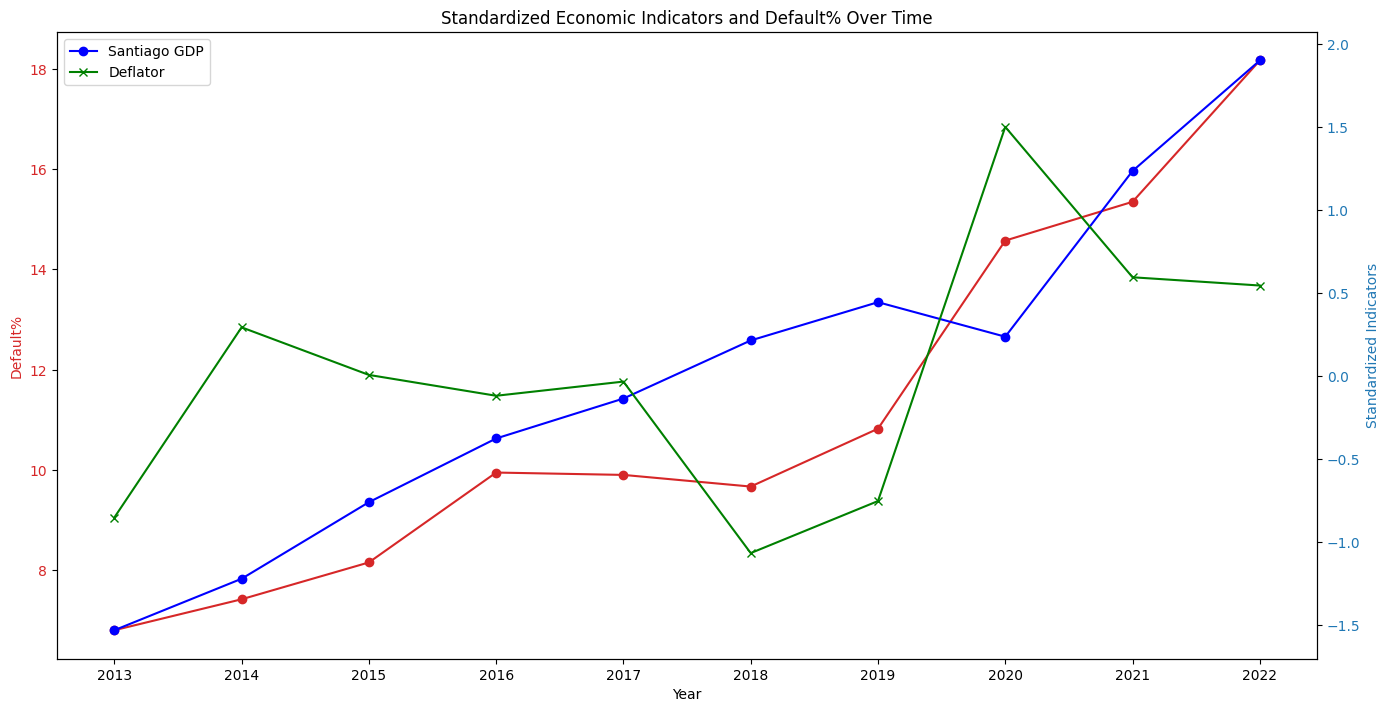

In [42]:
# Set up the plotting graph
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the first variable (Default%):
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Default%', color=color)
ax1.plot(df_new_clean['YEAR'], df_new_clean['Default%'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second axes for the standardized indicators:
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Standardized Indicators', color=color)
ax2.plot(df_new_clean['YEAR'], df_new_clean['GDP_Santiago_standardized'], label='Santiago GDP', color='blue', marker='o')
ax2.plot(df_new_clean['YEAR'], df_new_clean['Deflator_standardized'], label='Deflator', color='green', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Standardized Economic Indicators and Default% Over Time')
ax2.legend(loc='upper left')
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

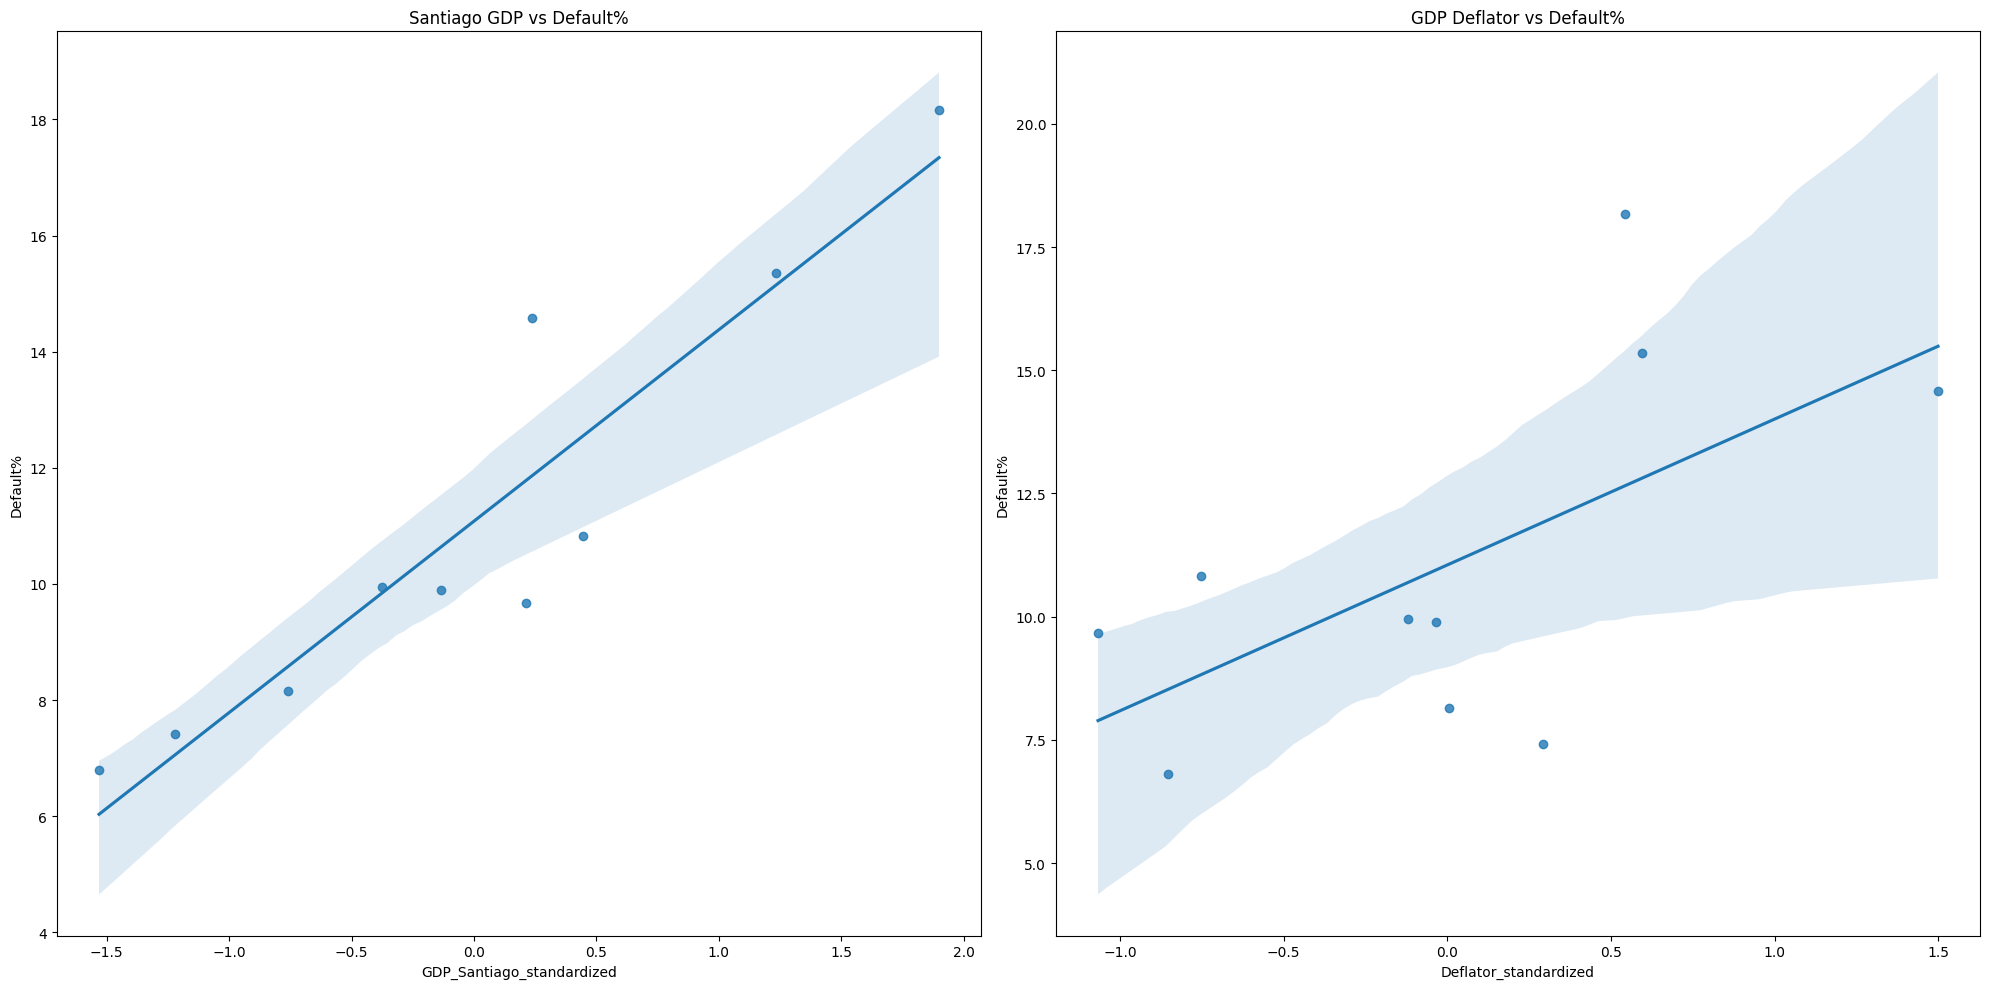

In [46]:
# Prepare a 2x2 grid for plotting
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Regression plot for GDP vs Default%
sns.regplot(x='GDP_Santiago_standardized', y='Default%', data=df_new_clean, ax=axs[0])
axs[0].set_title('Santiago GDP vs Default%')

# Regression plot for CPI vs Default%
sns.regplot(x='Deflator_standardized', y='Default%', data=df_new_clean, ax=axs[1])
axs[1].set_title('GDP Deflator vs Default%')

# Adjust the layout
plt.tight_layout()
plt.show()

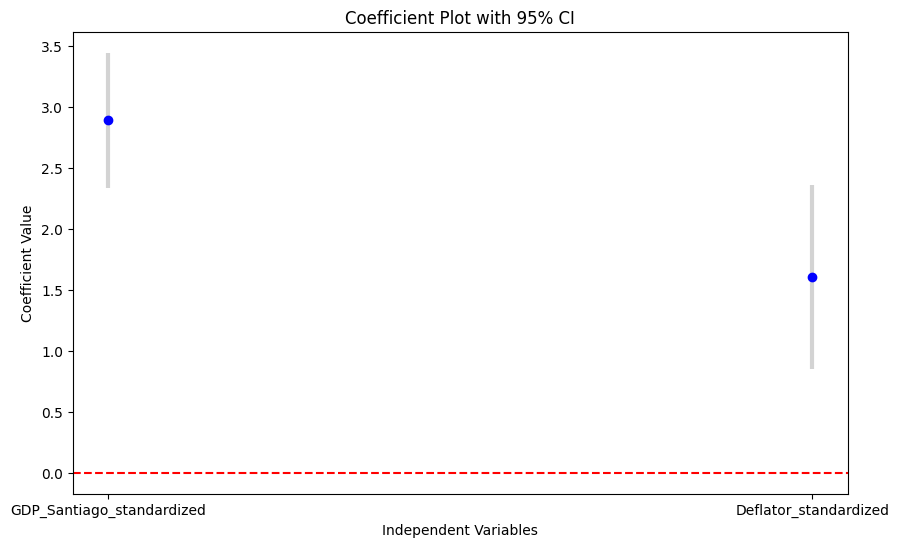

In [47]:
# Coefficient Plot
coefficients = sgdp_de_model.params[1:]  # Excluding the intercept
standard_errors = sgdp_de_model.bse[1:]  # Excluding the intercept for the constant term

# Create a figure for the coefficient plot
plt.figure(figsize=(10, 6))

# Plot the coefficients with error bars (2 standard errors for 95% confidence intervals)
plt.errorbar(x=coefficients.index, y=coefficients, yerr=2*standard_errors, fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, linestyle='--', color='red')

# Set the title and labels
plt.title('Coefficient Plot with 95% CI')
plt.xlabel('Independent Variables')
plt.ylabel('Coefficient Value')

# Show the plot
plt.show()

In [49]:
# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['variable'] = ['GDP_Santiago_standardized', 'Deflator_standardized']
vif_data['VIF'] = [variance_inflation_factor(df_new_clean[['GDP_Santiago_standardized', 'Deflator_standardized']].values, i) for i in range(2)]
print(vif_data)

                    variable       VIF
0  GDP_Santiago_standardized  1.136205
1      Deflator_standardized  1.136205


### Interaction

In [50]:
# Create interaction terms
df_new_clean['Santiago GDP_Deflator_interaction'] = df_new_clean['GDP_Santiago_standardized'] * df_new_clean['Deflator_standardized']

# Define the model with interaction terms
X = df_new_clean[['GDP_Santiago_standardized', 'Deflator_standardized', 'Santiago GDP_Deflator_interaction']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_new_clean['Default%']

# Fit the model
model_with_interactions = sm.OLS(y, X).fit()

# View the summary of the new model with interaction terms
print(model_with_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:               Default%   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           2.45e-06
Time:                        07:37:42   Log-Likelihood:                -4.0161
No. Observations:                  10   AIC:                             16.03
Df Residuals:                       6   BIC:                             17.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

<ipython-input-50-406849bbe4c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_clean['Santiago GDP_Deflator_interaction'] = df_new_clean['GDP_Santiago_standardized'] * df_new_clean['Deflator_standardized']
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Chile GDP, CPI, Debt

### Regression

In [36]:
df_cate_updated = merged_df[['YEAR', 'GDP_standardized', 'CPI_standardized', 'Debt_standardized', 'Default%']].dropna()
df_cate_updated

,YEAR,GDP_standardized,CPI_standardized,Debt_standardized,Default%
3,2009,-1.348267,-1.251736,-0.749750,6.5448
4,2010,-0.625111,-1.190261,-0.948517,9.4427
5,2011,0.081233,-1.042833,-0.764832,10.1237
6,2012,0.611661,-0.905744,-0.534287,10.7576
7,2013,0.767137,-0.814932,-0.242824,6.8015
8,2014,0.293589,-0.604409,0.070876,7.4191
9,2015,0.154362,-0.386786,0.355402,8.1544
10,2016,-0.115416,-0.189218,0.531033,9.9478
11,2017,-0.194398,-0.071001,0.736673,9.9008
12,2018,0.570839,0.057057,1.042763,9.6684


In [37]:
# Prepare data for OLS regression
X = df_cate_updated[['GDP_standardized', 'CPI_standardized', 'Debt_standardized']]
X = sm.add_constant(X)  # adding a constant to the model
y = df_cate_updated['Default%']

# Fit OLS model
cate_model2 = sm.OLS(y, X).fit()
predictions = cate_model2.predict(X)

# Print the summary of the OLS model
print(cate_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               Default%   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     12.38
Date:                Tue, 30 Apr 2024   Prob (F-statistic):            0.00152
Time:                        06:54:24   Log-Likelihood:                -19.911
No. Observations:                  13   AIC:                             47.82
Df Residuals:                       9   BIC:                             50.08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.6659      1.22

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Visuals

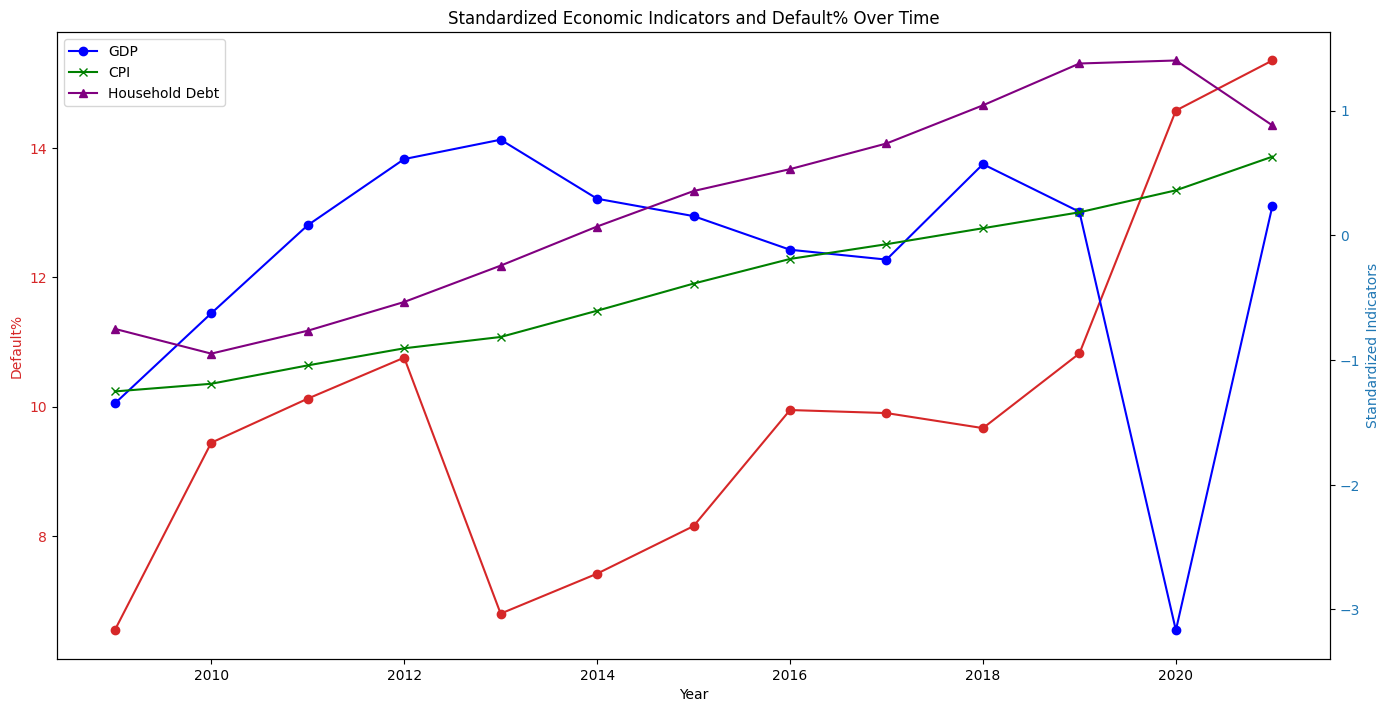

In [38]:
# Set up the plotting graph
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the first variable (Default%):
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Default%', color=color)
ax1.plot(df_cate_updated['YEAR'], df_cate_updated['Default%'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second axes for the standardized indicators:
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Standardized Indicators', color=color)
ax2.plot(df_cate_updated['YEAR'], df_cate_updated['GDP_standardized'], label='GDP', color='blue', marker='o')
ax2.plot(df_cate_updated['YEAR'], df_cate_updated['CPI_standardized'], label='CPI', color='green', marker='x')
ax2.plot(df_cate_updated['YEAR'], df_cate_updated['Debt_standardized'], label='Household Debt', color='purple', marker='^')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Standardized Economic Indicators and Default% Over Time')
ax2.legend(loc='upper left')
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

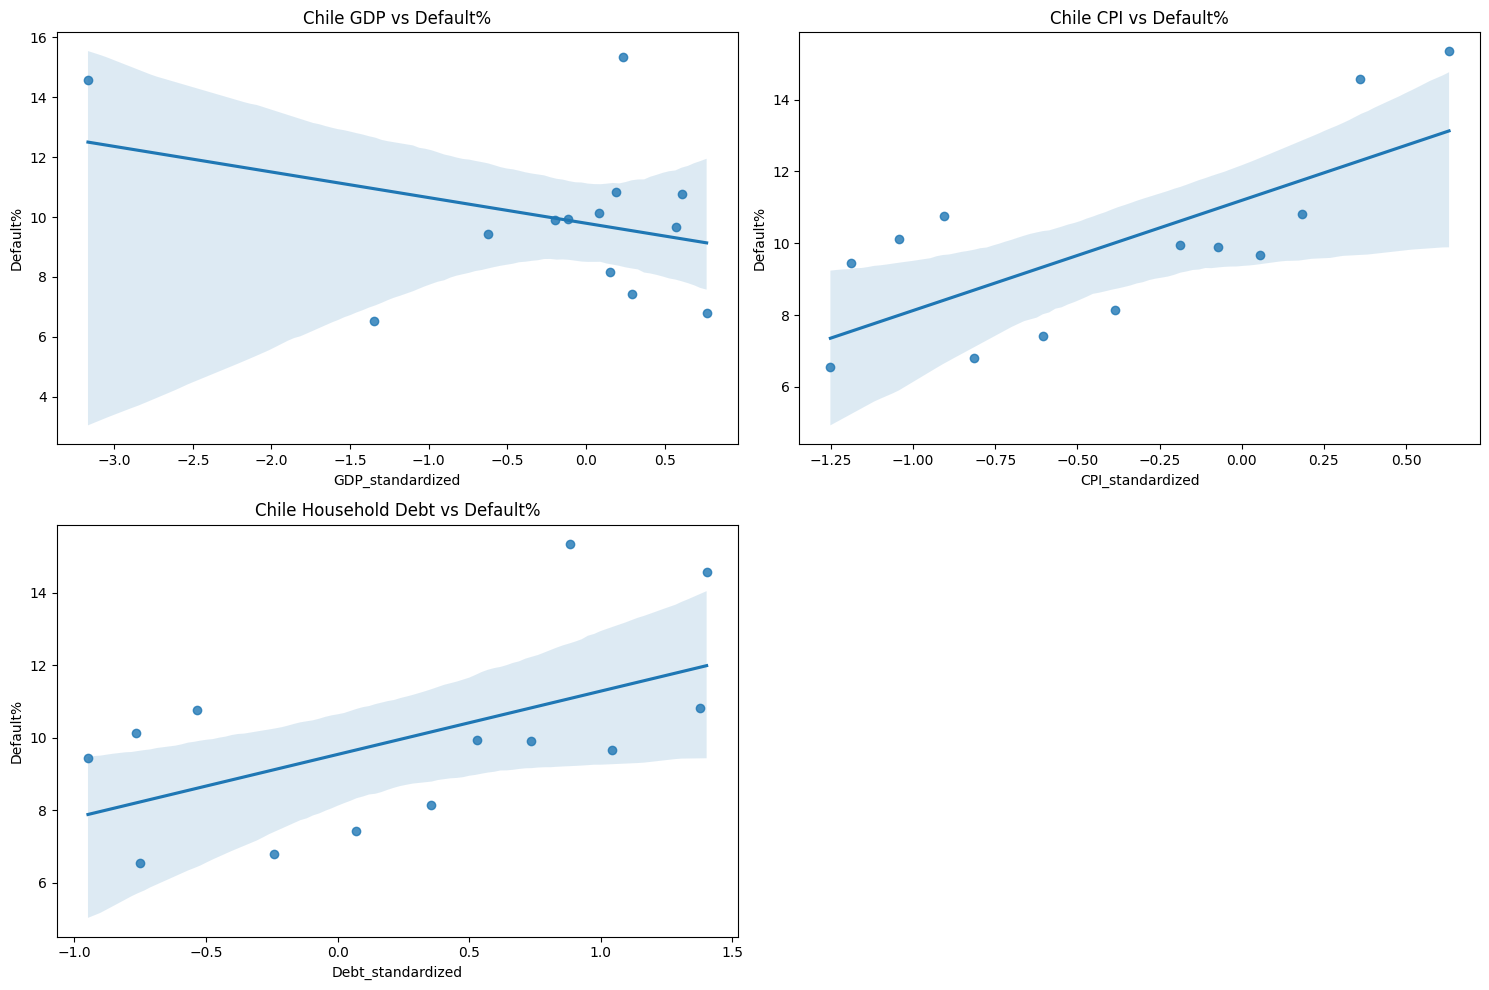

In [39]:
# Prepare a 2x2 grid for plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Regression plot for GDP vs Default%
sns.regplot(x='GDP_standardized', y='Default%', data=df_cate_updated, ax=axs[0])
axs[0].set_title('Chile GDP vs Default%')

# Regression plot for CPI vs Default%
sns.regplot(x='CPI_standardized', y='Default%', data=df_cate_updated, ax=axs[1])
axs[1].set_title('Chile CPI vs Default%')

# Regression plot for Debt vs Default%
sns.regplot(x='Debt_standardized', y='Default%', data=df_cate_updated, ax=axs[2])
axs[2].set_title('Chile Household Debt vs Default%')

# Since we have only three plots, we can remove the last subplot
fig.delaxes(axs[3])

# Adjust the layout
plt.tight_layout()
plt.show()

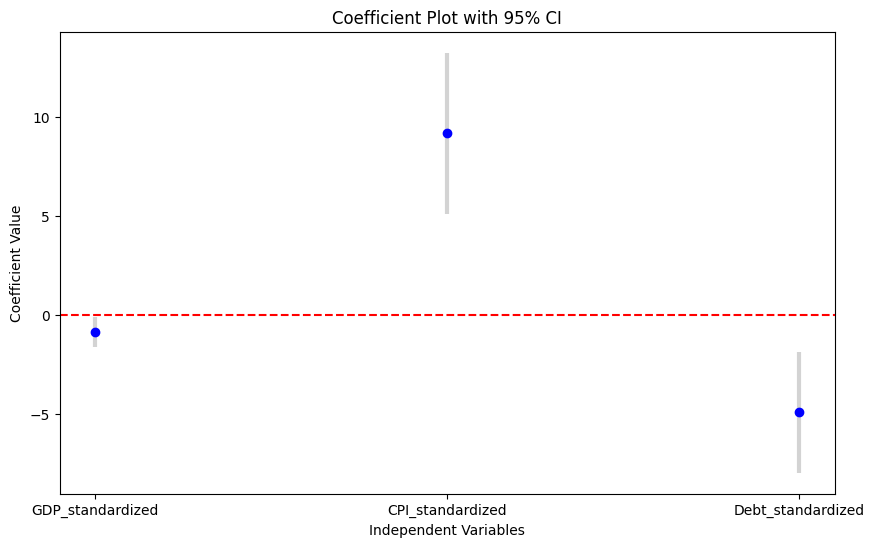

In [40]:
# Coefficient Plot
coefficients = cate_model2.params[1:]  # Excluding the intercept
standard_errors = cate_model2.bse[1:]  # Excluding the intercept for the constant term

# Create a figure for the coefficient plot
plt.figure(figsize=(10, 6))

# Plot the coefficients with error bars (2 standard errors for 95% confidence intervals)
plt.errorbar(x=coefficients.index, y=coefficients, yerr=2*standard_errors, fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, linestyle='--', color='red')

# Set the title and labels
plt.title('Coefficient Plot with 95% CI')
plt.xlabel('Independent Variables')
plt.ylabel('Coefficient Value')

# Show the plot
plt.show()

In [41]:
# Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['variable'] = ['GDP_standardized', 'CPI_standardized', 'Debt_standardized']
vif_data['VIF'] = [variance_inflation_factor(df_cate_updated[['GDP_standardized', 'CPI_standardized', 'Debt_standardized']].values, i) for i in range(3)]
print(vif_data)

            variable       VIF
0   GDP_standardized  1.083302
1   CPI_standardized  1.579150
2  Debt_standardized  1.660664


### Interaction

In [51]:
# Create interaction terms
df_cate_updated['GDP_CPI_interaction'] = df_cate_updated['GDP_standardized'] * df_cate_updated['CPI_standardized']
df_cate_updated['GDP_Debt_interaction'] = df_cate_updated['GDP_standardized'] * df_cate_updated['Debt_standardized']
df_cate_updated['CPI_Debt_interaction'] = df_cate_updated['CPI_standardized'] * df_cate_updated['Debt_standardized']

# Define the model with interaction terms
X = df_cate_updated[['GDP_standardized', 'CPI_standardized', 'Debt_standardized', 'GDP_CPI_interaction', 'GDP_Debt_interaction', 'CPI_Debt_interaction']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_cate_updated['Default%']

# Fit the model
model_with_interactions = sm.OLS(y, X).fit()

# View the summary of the new model with interaction terms
print(model_with_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:               Default%   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     13.32
Date:                Tue, 30 Apr 2024   Prob (F-statistic):            0.00306
Time:                        07:43:56   Log-Likelihood:                -13.231
No. Observations:                  13   AIC:                             40.46
Df Residuals:                       6   BIC:                             44.42
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.2584 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [55]:
# Define the model with interaction terms
X = df_cate_updated[['CPI_standardized', 'CPI_Debt_interaction']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_cate_updated['Default%']

# Fit the model
model_with_interactions2 = sm.OLS(y, X).fit()

# View the summary of the new model with interaction terms
print(model_with_interactions2.summary())

                            OLS Regression Results                            
Dep. Variable:               Default%   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     20.45
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           0.000293
Time:                        07:47:45   Log-Likelihood:                -19.957
No. Observations:                  13   AIC:                             45.91
Df Residuals:                      10   BIC:                             47.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.3265 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
